# Birthday Paradox

Calcular la probabilidad de que **n** personas de un grupo de **N** celebren su cumpleaños el mismo dia.

**Supuestos**
* El año tiene 364 días
* No tomamos en cuenta año bisiesto.
* El 1 de enero equivale a 1
* El 31 de diciembre equivale a 364
* La probabilidad de nacer en cualquier día del año es uniforme


## Paso 0 - Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Paso 1 - Generar grupos de personas

In [2]:
np.random.randint(1,10,size=10)

array([1, 4, 1, 6, 8, 8, 1, 1, 3, 5])

In [3]:
np.random.permutation(10)

array([4, 1, 3, 0, 9, 2, 8, 5, 7, 6])

In [4]:
def generate_group(N):
    """Esta funcion toma un entero y regresa un vector con N fechas de cumpleaños"""
    return np.random.randint(1,364,size=N)

In [5]:
generate_group(30)

array([319,  95, 241, 332, 333,  12,  52,  98, 247, 115, 227, 310,  67,
       213, 289,  64,  76, 157, 113, 242,  18, 218, 220,   9, 105, 342,
       290, 276, 309, 189])

## Paso 2 - Encontrar repeticiones en el grupo

In [6]:
grupo_test = generate_group(20)
u,c = np.unique(grupo_test, return_counts=True)
print(np.sort(grupo_test,axis=None))
print(sum(c>1))

[ 12  20  21  34  58 116 129 142 144 155 163 203 238 243 265 278 288 296
 341 344]
0


In [7]:
def hay_repetidos(grupo):
    """Esta funcion toma un vector de fechas de cumpleaños y 
    retorna si hay personar en el grupo que tienen el mismo
    cumpleaños"""
    u,c = np.unique(grupo, return_counts=True)
    if sum(c>1):
        return True
    else:
        return False

In [8]:
grupo_test = generate_group(20)
hay_repetidos(grupo_test)

True

## Paso 3 - Simular la muestra de multiples grupos de tamaño N

In [9]:
cnt=0
sim = 10000
size = 30
for i in range(sim):
    grupo = generate_group(size)
    if hay_repetidos(grupo):
        cnt+=1
print(cnt/sim)

0.7091


In [10]:
def birthday_paradox_probability(sim=1000,size=20):
    cnt=0
    for i in range(sim):
        grupo = generate_group(size)
        if hay_repetidos(grupo):
            cnt+=1
    return cnt/sim
    

In [11]:
birthday_paradox_probability(10000,10)

0.1143

## Paso 4 - Determinar la probabilidad para todos los posibles tamaños de grupos

In [69]:
vbirthday_paradox_probability = np.vectorize(birthday_paradox_probability_v2)

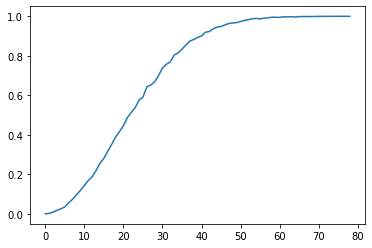

In [70]:
vprob=vbirthday_paradox_probability(5000,range(1,80))
plt.plot(vprob)
plt.show()

In [36]:
vgenerate_group = np.vectorize(generate_group,otypes=[np.ndarray])

In [49]:
test=vgenerate_group(np.repeat(30,5000))

In [51]:
vhay_repetidos = np.vectorize(hay_repetidos)
sum(vhay_repetidos(test))/5000

0.7052

In [71]:
vgenerate_group = np.vectorize(generate_group,otypes=[np.ndarray])
vhay_repetidos = np.vectorize(hay_repetidos)
def birthday_paradox_probability_v2(sim=1000,size=20):
    ngrupos=vgenerate_group(np.repeat(size,sim))
    return sum(vhay_repetidos(ngrupos))/sim

In [79]:
%timeit birthday_paradox_probability_v2(10000,30)

808 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%time birthday_paradox_probability(10000,30)

CPU times: user 894 ms, sys: 6.22 ms, total: 901 ms
Wall time: 900 ms


0.71